# Sales forecasting

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
sales = pd.read_csv("/home/rokesh/Data-Analysis-project/sales forecasting/train.csv")
sales.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [5]:
sales.tail()

,date,store,item,sales
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62
912999,2017-12-31,10,50,82


In [6]:
sales.columns

Index(['date', 'store', 'item', 'sales'], dtype='object')

In [7]:
sales.info

<bound method DataFrame.info of               date  store  item  sales
0       2013-01-01      1     1     13
1       2013-01-02      1     1     11
2       2013-01-03      1     1     14
3       2013-01-04      1     1     13
4       2013-01-05      1     1     10
...            ...    ...   ...    ...
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82

[913000 rows x 4 columns]>

In [8]:
sales = sales.drop(["store","item"],axis=1)

In [9]:
sales['date'] = pd.to_datetime(sales['date'],errors='coerce')
sales['date'] = sales['date'].dt.to_period('M')
monthly_sales = sales.groupby('date').sum().reset_index()

In [10]:
monthly_sales.head(12)

,date,sales
0,2013-01,454904
1,2013-02,459417
2,2013-03,617382
3,2013-04,682274
4,2013-05,763242
5,2013-06,795597
6,2013-07,855922
7,2013-08,766761
8,2013-09,689907
9,2013-10,656587


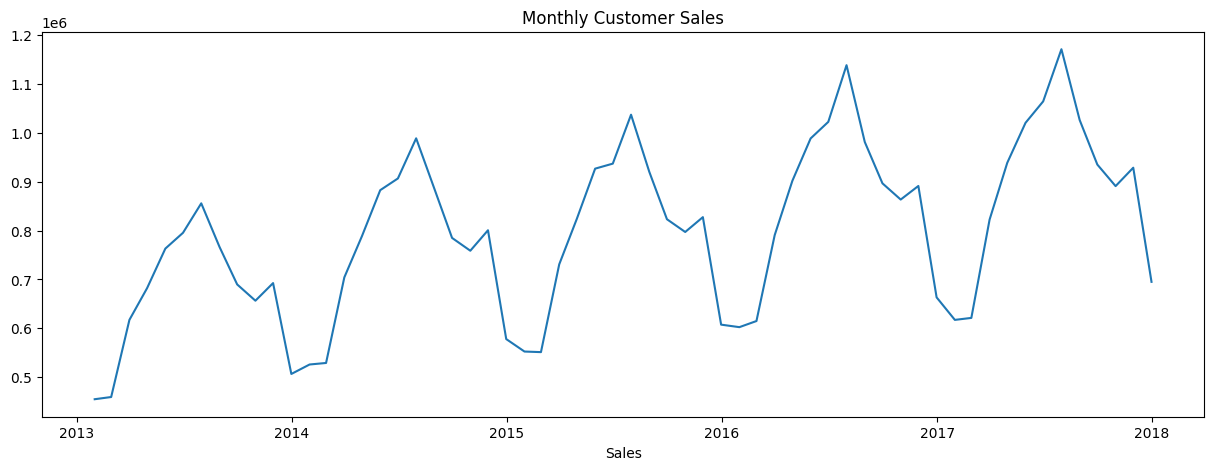

In [11]:
plt.figure(figsize=(15,5))
plt.plot_date(monthly_sales['date'], monthly_sales['sales'],'-')
plt.xlabel('Date')
plt.xlabel('Sales')
plt.title("Monthly Customer Sales")
plt.show()

In [30]:
monthly_sales['sales_diff'] = monthly_sales['sales'].diff()
monthly_sales = monthly_sales.dropna()
monthly_sales.tail(12)

,date,sales,sales_diff
48,2017-01,617306,-46105.0
49,2017-02,621369,4063.0
50,2017-03,822667,201298.0
51,2017-04,938862,116195.0
52,2017-05,1020686,81824.0
53,2017-06,1064624,43938.0
54,2017-07,1171393,106769.0
55,2017-08,1026403,-144990.0
56,2017-09,935263,-91140.0
57,2017-10,891160,-44103.0


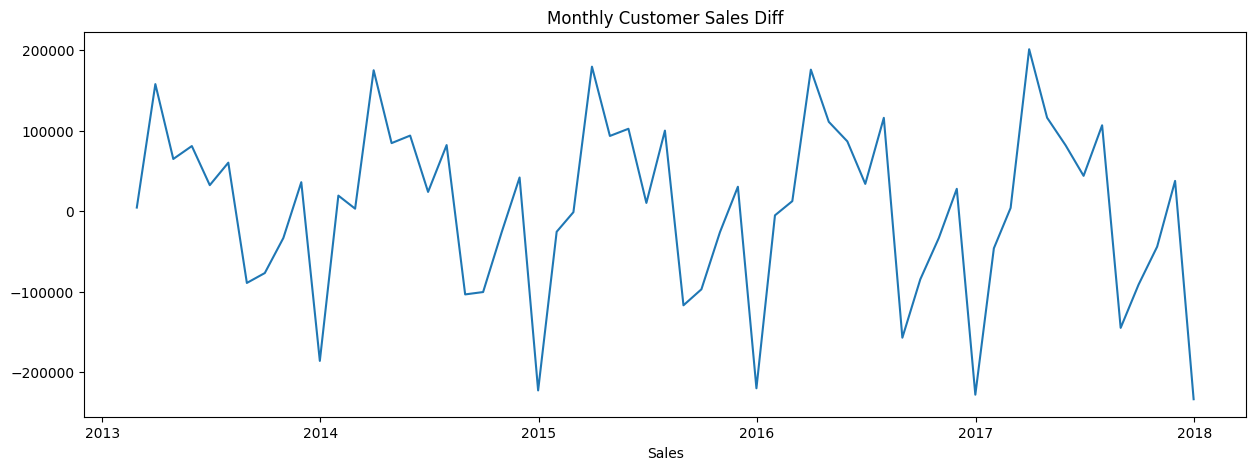

In [13]:
plt.figure(figsize=(15,5))
plt.plot_date(monthly_sales['date'], monthly_sales['sales_diff'],'-')
plt.xlabel('Date')
plt.xlabel('Sales')
plt.title("Monthly Customer Sales Diff")
plt.show()

In [14]:
supverised_data = monthly_sales.drop(['date','sales'], axis=1)

In [15]:
for i in range(1,13):
    col_name = 'month-' + str(i)
    supverised_data[col_name] = supverised_data['sales_diff'].shift(i)
supverised_data = supverised_data.dropna().reset_index(drop=True)
supverised_data

,sales_diff,month-1,month-2,month-3,month-4,month-5,month-6,month-7,month-8,month-9,month-10,month-11,month-12
0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0,4513.0
1,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0,157965.0
2,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0,64892.0
3,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0,80968.0
4,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0,32355.0
5,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0,60325.0
6,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0,-89161.0
7,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0,-76854.0
8,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0,-33320.0
9,41900.0,-26241.0,-100472.0,-103414.0,82168.0,23965.0,93963.0,84613.0,175184.0,3130.0,19380.0,-186036.0,36056.0


In [16]:
train_data = supverised_data[:-12]
test_data = supverised_data[-12:]
print('Train Data Shape:', train_data.shape)
print('Test Data Shape:', test_data.shape)

Train Data Shape: (35, 13)
Test Data Shape: (12, 13)


In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [18]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [19]:
X_train, y_train = train_data[:,1:], train_data[:,0:1]
X_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (35, 12)
y_train Shape: (35,)
X_test Shape: (12, 12)
y_test Shape: (12,)


In [20]:
sales_dates = monthly_sales['date'][-12:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [21]:
act_sales = monthly_sales['sales'][-13:].to_list()

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [23]:
rf_model = RandomForestRegressor(n_estimators=100, max_depth=20)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [24]:
rf_pred = rf_pred.reshape(-1,1)
rf_pred_test_set = np.concatenate([rf_pred,X_test], axis=1)
rf_pred_test_set = scaler.inverse_transform(rf_pred_test_set)

In [25]:
result_list = []
for index in range(0, len(rf_pred_test_set)):
    result_list.append(rf_pred_test_set[index][0] + act_sales[index])
rf_pred_series = pd.Series(result_list, name='rf_pred')
predict_df = predict_df.merge(rf_pred_series, left_index=True, right_index=True)

In [26]:
predict_df

,date,rf_pred
0,2017-01,651734.10
1,2017-02,621789.93
2,2017-03,787754.37
3,2017-04,924483.47
4,2017-05,1034679.58
5,2017-06,1044769.41
6,2017-07,1170612.42
7,2017-08,1040972.15
8,2017-09,929548.93
9,2017-10,910399.99


In [27]:
rf_rmse = np.sqrt(mean_squared_error(predict_df['rf_pred'], monthly_sales['sales'][-12:]))
rf_mae = mean_absolute_error(predict_df['rf_pred'], monthly_sales['sales'][-12:])
rf_r2 = r2_score(predict_df['rf_pred'], monthly_sales['sales'][-12:])
print('Random Forest RMSE: ', rf_rmse)
print('Random Forest MAE: ', rf_mae)
print('Random Forest R2 Score: ', rf_r2)

Random Forest RMSE:  19541.87945614753
Random Forest MAE:  16332.870000000034
Random Forest R2 Score:  0.985594479178256


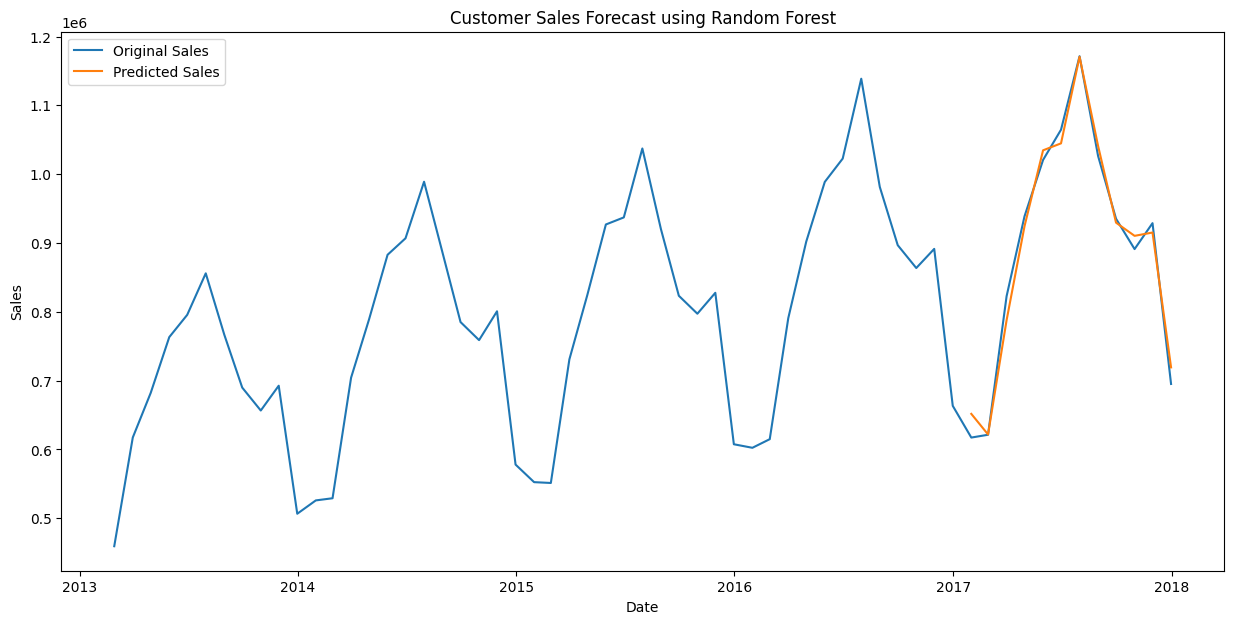

In [28]:
plt.figure(figsize=(15,7))
plt.plot_date(monthly_sales['date'], monthly_sales['sales'],'-')
plt.plot(predict_df['date'], predict_df['rf_pred'])
plt.title("Customer Sales Forecast using Random Forest")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(["Original Sales", "Predicted Sales"])
plt.show()